In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io, color, feature
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
dataset_dir = 'kaggleDataset1/'

In [3]:
img_paths = []
labels = []

In [4]:
# Iterate over the directories in the dataset directory
for label in os.listdir(dataset_dir):
    label_dir = os.path.join(dataset_dir, label)
    if os.path.isdir(label_dir):
        # Iterate over the image files in each label directory
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            img_paths.append(img_path)
            labels.append(label)

In [5]:
# Preprocess images and compute HOG features
# Preprocess images and compute HOG features
hog_features = []
for img_path in img_paths:
    img = io.imread(img_path)
    if img.ndim == 3:  # Convert RGB to grayscale
        img = color.rgb2gray(img)
    hog_feature = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys')
    hog_features.append(hog_feature)


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)


                  precision    recall  f1-score   support

    MildDemented       0.98      0.96      0.97       159
ModerateDemented       1.00      1.00      1.00        16
     NonDemented       0.94      0.95      0.95       499
VeryMildDemented       0.93      0.92      0.92       351

        accuracy                           0.94      1025
       macro avg       0.96      0.96      0.96      1025
    weighted avg       0.94      0.94      0.94      1025



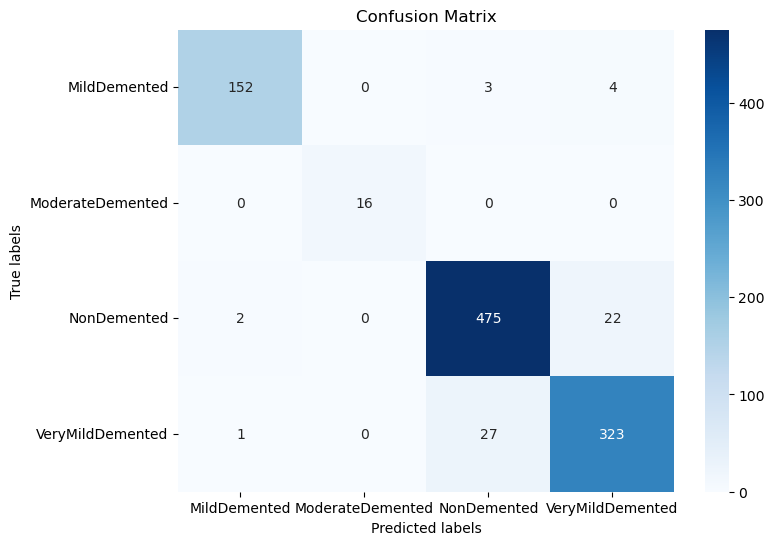

Accuracy for class 0: 0.9559748427672956
Accuracy for class 1: 1.0
Accuracy for class 2: 0.9519038076152304
Accuracy for class 3: 0.9202279202279202


In [7]:
# Train SVM classifier for linear kernel
svm_classifier1 = SVC(kernel='linear')
svm_classifier1.fit(X_train, y_train)


# Predict on testing set
y_pred = svm_classifier1.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix1 = confusion_matrix(y_test, y_pred)

# Define your classes
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
# Calculate accuracy for each class
class_accuracy = conf_matrix1.diagonal() / conf_matrix1.sum(axis=1)

# Print accuracy for each class
for idx, accuracy in enumerate(class_accuracy):
    print(f"Accuracy for class {idx}: {accuracy}")

                  precision    recall  f1-score   support

    MildDemented       0.98      0.69      0.81       159
ModerateDemented       1.00      0.25      0.40        16
     NonDemented       0.85      0.96      0.90       499
VeryMildDemented       0.83      0.81      0.82       351

        accuracy                           0.85      1025
       macro avg       0.91      0.68      0.73      1025
    weighted avg       0.86      0.85      0.85      1025



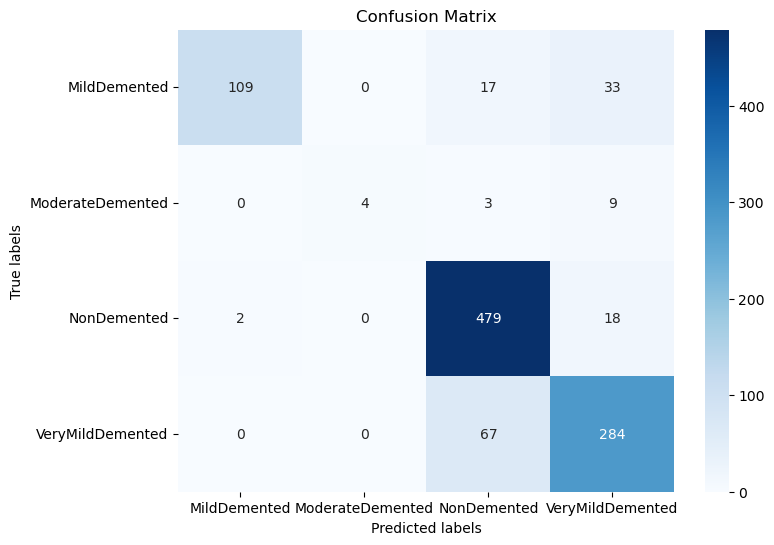

Accuracy for class 0: 0.6855345911949685
Accuracy for class 1: 0.25
Accuracy for class 2: 0.9599198396793587
Accuracy for class 3: 0.8091168091168092


In [8]:
svm_classifier2 = SVC(kernel='rbf')
svm_classifier2.fit(X_train, y_train)

# Predict on testing set
y_pred = svm_classifier2.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred)

# Define your classes
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy for each class
class_accuracy = conf_matrix2.diagonal() / conf_matrix2.sum(axis=1)

# Print accuracy for each class
for idx, accuracy in enumerate(class_accuracy):
    print(f"Accuracy for class {idx}: {accuracy}")


                  precision    recall  f1-score   support

    MildDemented       1.00      0.96      0.98       159
ModerateDemented       1.00      1.00      1.00        16
     NonDemented       0.97      0.99      0.98       499
VeryMildDemented       0.99      0.97      0.98       351

        accuracy                           0.98      1025
       macro avg       0.99      0.98      0.99      1025
    weighted avg       0.98      0.98      0.98      1025



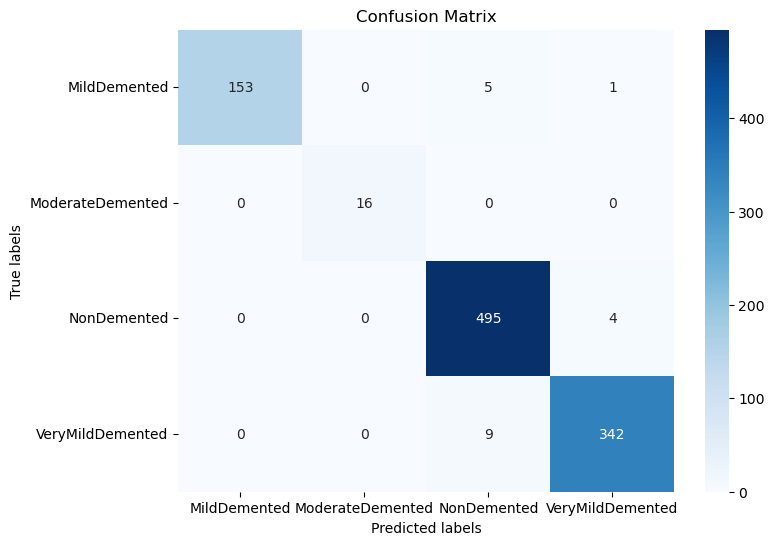

Accuracy for class 0: 0.9622641509433962
Accuracy for class 1: 1.0
Accuracy for class 2: 0.9919839679358717
Accuracy for class 3: 0.9743589743589743


In [9]:


svm_classifier3 = SVC(kernel='poly', degree=3)
svm_classifier3.fit(X_train, y_train)

# Predict on testing set
y_pred = svm_classifier3.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix3 = confusion_matrix(y_test, y_pred)

# Define your classes
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
# Calculate accuracy for each class
class_accuracy = conf_matrix3.diagonal() / conf_matrix3.sum(axis=1)

# Print accuracy for each class
for idx, accuracy in enumerate(class_accuracy):
    print(f"Accuracy for class {idx}: {accuracy}")

In [10]:
# Evaluate the model
accuracy = svm_classifier1.score(X_test, y_test)
print("Accuracy for linear kernel:", accuracy)
accuracy = svm_classifier2.score(X_test, y_test)
print("Accuracy for rbf kernel:", accuracy)
accuracy = svm_classifier3.score(X_test, y_test)
print("Accuracy for poly kernel:", accuracy)

Accuracy for linear kernel: 0.9424390243902439
Accuracy for rbf kernel: 0.8546341463414634
Accuracy for poly kernel: 0.9814634146341463
